In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import keras
from keras.layers import Input, Dense

In [ ]:
gdf = gpd.read_file("/content/Walkability_TES_Temp(Updated values).xlsx")
display(gdf.head())

,D2B_E8MIXA,D2A_EPHHM,D3B,D4A,D2A_Ranked,D2B_Ranked,D3B_Ranked,D4A_Ranked,NatWalkInd,AverageTem,...,cbg_pop,acs_pop,Land Area (acres),Land Area (km2),TreeEquityScore,rank,Temp_Ranked,TES_Ranked(1-20),Pop_Density,Density Category
0,0.662091,0.348912,115.981747,362.10,6.0,14.0,15.0,17.0,14.000000,34.841099,...,1508.0,1646.0,73.595028,0.297829,100,1.0,1.0,20,5526.67,High
1,0.554458,0.197047,80.145600,718.84,3.0,10.0,12.0,14.0,10.833333,34.375702,...,1508.0,1646.0,119.829909,0.484935,100,1.0,2.0,20,3394.27,Moderate
2,0.000000,0.000000,24.272717,398.31,1.0,1.0,7.0,17.0,8.333333,34.375702,...,1027.0,420.0,26.367053,0.106704,100,1.0,2.0,20,3936.13,Moderate
3,0.553831,0.682830,141.604424,386.24,16.0,10.0,17.0,17.0,15.666667,34.412701,...,1969.0,1879.0,119.060687,0.481822,100,1.0,2.0,20,3899.78,Moderate
4,0.459064,0.261472,65.307963,638.37,4.0,7.0,11.0,14.0,10.166667,34.516201,...,1969.0,1879.0,169.927211,0.687672,100,1.0,2.0,20,2732.41,Moderate


In [ ]:
gdf.describe()

,D2B_E8MIXA,D2A_EPHHM,D3B,D4A,D2A_Ranked,D2B_Ranked,D3B_Ranked,D4A_Ranked,NatWalkInd,AverageTem,ua_pop,cbg_pop,acs_pop,Land Area (acres),Land Area (km2),rank,Temp_Ranked,Pop_Density
count,216226.000000,216226.000000,216226.000000,216226.000000,216226.000000,216226.000000,216226.000000,216226.000000,216226.000000,216226.000000,2.162260e+05,216226.000000,216226.000000,2.162260e+05,216226.000000,216226.000000,216226.000000,216226.000000
mean,0.539310,0.504792,78.265093,-56552.143605,10.638314,10.637916,10.510045,7.712232,9.620130,29.459700,2.275512e+06,1004.596404,1009.300907,9.066324e+03,36.690143,169.413558,10.520159,2466.756100
std,0.214155,0.221857,83.053439,49767.644982,5.689765,5.694180,5.757455,7.824478,4.348732,3.414960,3.624169e+06,859.415409,896.781980,6.466590e+04,261.693852,663.753915,5.768093,6302.227263
min,0.000000,0.000000,0.000000,-99999.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12.976700,0.000000e+00,0.000000,0.000000,1.096136e+00,0.004436,0.000000,1.000000,0.000000
25%,0.407668,0.336277,13.306341,-99999.000000,6.000000,6.000000,6.000000,1.000000,6.000000,27.160025,0.000000e+00,0.000000,0.000000,1.239305e+02,0.501530,0.000000,6.000000,0.000000
50%,0.574745,0.518031,60.705311,-99999.000000,11.000000,11.000000,11.000000,1.000000,9.166667,29.142000,3.955260e+05,1016.000000,983.000000,3.401651e+02,1.376601,5.000000,11.000000,898.360000
75%,0.703479,0.678164,116.501002,347.350000,16.000000,16.000000,15.000000,16.000000,13.333333,31.842600,3.070388e+06,1538.000000,1563.000000,2.355658e+03,9.533020,43.000000,16.000000,2403.817500
max,0.993980,1.000000,5289.518414,1207.000000,20.000000,20.000000,20.000000,20.000000,20.000000,46.191799,1.291119e+07,18391.000000,18421.000000,4.820782e+06,19509.029845,6628.000000,21.000000,290808.600000


In [ ]:
gdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216324 entries, 0 to 216323
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   D2B_E8MIXA         216226 non-null  float64
 1   D2A_EPHHM          216226 non-null  float64
 2   D3B                216226 non-null  float64
 3   D4A                216226 non-null  float64
 4   D2A_Ranked         216226 non-null  float64
 5   D2B_Ranked         216226 non-null  float64
 6   D3B_Ranked         216226 non-null  float64
 7   D4A_Ranked         216226 non-null  float64
 8   NatWalkInd         216226 non-null  float64
 9   AverageTem         216226 non-null  float64
 10  GEOID              216226 non-null  object 
 11  place              145238 non-null  object 
 12  state              216226 non-null  object 
 13  state_abbr         216226 non-null  object 
 14  county             152824 non-null  object 
 15  ua_pop             216226 non-null  float64
 16  cb

In [ ]:
df_ranked = gdf[['D2A_Ranked', 'D2B_Ranked', 'D3B_Ranked', 'D4A_Ranked', 'Temp_Ranked', 'TES_Ranked(1-20)']].copy()

In [ ]:
df_ranked = df_ranked.dropna()

In [ ]:
df_ranked.describe()

,D2A_Ranked,D2B_Ranked,D3B_Ranked,D4A_Ranked,Temp_Ranked
count,216226.000000,216226.000000,216226.000000,216226.000000,216226.000000
mean,10.638314,10.637916,10.510045,7.712232,10.520159
std,5.689765,5.694180,5.757455,7.824478,5.768093
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,6.000000,6.000000,6.000000,1.000000,6.000000
50%,11.000000,11.000000,11.000000,1.000000,11.000000
75%,16.000000,16.000000,15.000000,16.000000,16.000000
max,20.000000,20.000000,20.000000,20.000000,21.000000


In [ ]:
df_ranked.isnull().sum()

,0
D2A_Ranked,0
D2B_Ranked,0
D3B_Ranked,0
D4A_Ranked,0
Temp_Ranked,0
TES_Ranked(1-20),0


In [ ]:
df_ranked['TES_Ranked(1-20)'] = pd.to_numeric(df_ranked['TES_Ranked(1-20)'], errors='coerce')
median_tes_ranked = df_ranked['TES_Ranked(1-20)'].median()
df_ranked['TES_Ranked(1-20)'] = df_ranked['TES_Ranked(1-20)'].fillna(median_tes_ranked)

In [ ]:
X_train, X_test = train_test_split(df_ranked, test_size=.3, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
pca = PCA(n_components=6)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Loadings (Components):")
print(pca.components_)


Explained Variance Ratio: [0.27176659 0.24328757 0.16712995 0.16001596 0.08918576 0.06861417]
Loadings (Components):
[[ 0.13566988  0.13386241  0.66871317  0.65842455  0.15968174 -0.2397417 ]
 [ 0.69157508  0.6813503  -0.13042161 -0.18401535  0.05067985 -0.06360648]
 [-0.09623668  0.10638184 -0.05525764  0.08124326  0.78389348  0.59605247]
 [ 0.01222913  0.18494397  0.19731121  0.17231535 -0.5905624   0.74044441]
 [ 0.69179032 -0.6644001  -0.13536558  0.18477364  0.0212732   0.16456301]
 [ 0.12382527 -0.17576624  0.68956793 -0.67983904  0.09070725  0.08866046]]


Text(0.5, 1.0, 'Explained Variance Ratio for Each Principal Component')

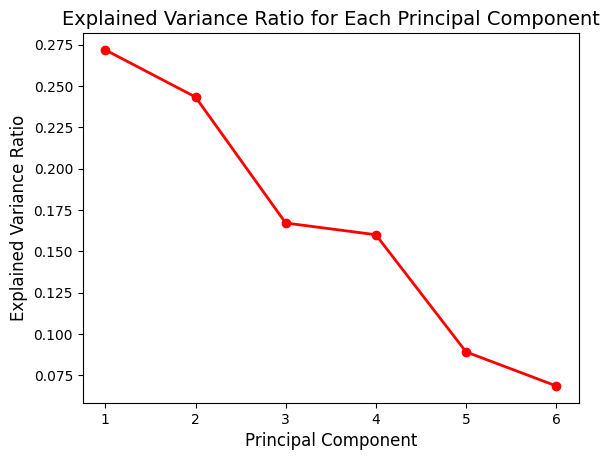

In [ ]:
PC_vals = range(1, pca.n_components_ + 1)
plt.plot(PC_vals, pca.explained_variance_ratio_, 'o-', linewidth=2, color='red')
plt.xlabel('Principal Component', fontsize=12)
plt.ylabel('Explained Variance Ratio', fontsize=12)
plt.title('Explained Variance Ratio for Each Principal Component', fontsize=14)

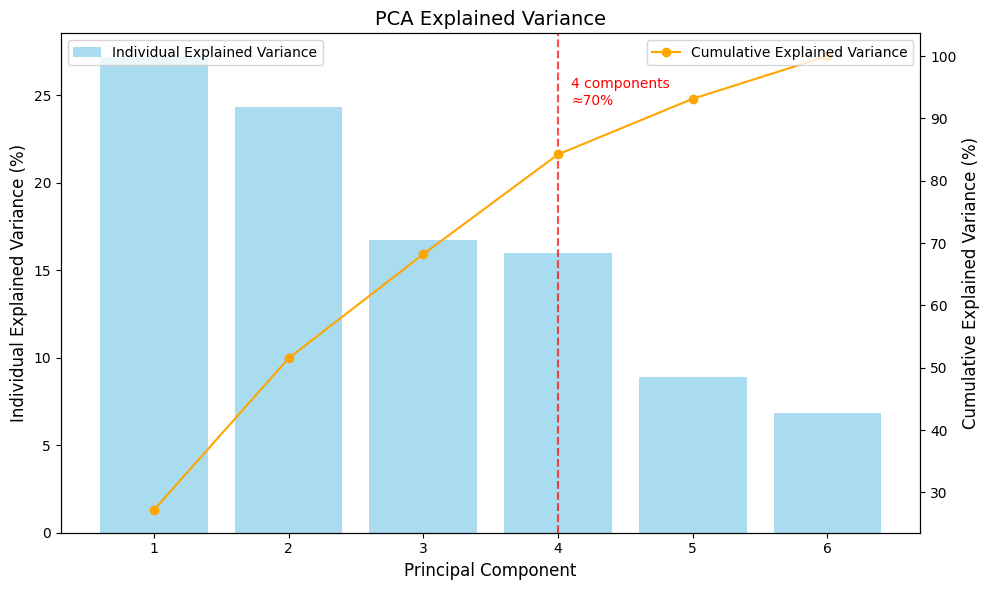

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

# Bar plot for individual explained variance
explained_variance = pca.explained_variance_ratio_
ax.bar(PC_vals, explained_variance*100, alpha=0.7, color='skyblue', label='Individual Explained Variance')

# Line plot for cumulative explained variance
cumulative_variance = np.cumsum(explained_variance)
ax2 = ax.twinx()  # secondary y-axis
ax2.plot(PC_vals, cumulative_variance*100, color='orange', marker='o', label='Cumulative Explained Variance')

# Labels and title
ax.set_xlabel('Principal Component', fontsize=12)
ax.set_ylabel('Individual Explained Variance (%)', fontsize=12)
ax2.set_ylabel('Cumulative Explained Variance (%)', fontsize=12)
plt.title('PCA Explained Variance', fontsize=14)

# Optional: highlight first components that explain majority of variance
threshold = 0.7  # 70%
n_components = np.argmax(cumulative_variance >= threshold) + 1
ax.axvline(x=n_components, color='red', linestyle='--', alpha=0.7)
ax.text(n_components+0.1, max(explained_variance*100)*0.9, f'{n_components} components\n≈70%', color='red')

# Legends
ax.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()


In [ ]:
# using PC1 for our base as it has largest shared variance
# loadings of PC1 become our feature weights in our index.

In [ ]:
loadings = pd.DataFrame(pca.components_.T, index=df_ranked.columns, columns=[f'PC{i+1}' for i in range(pca.n_components_)])

In [ ]:
loadings.head(6)

,PC1,PC2,PC3,PC4,PC5,PC6
D2A_Ranked,0.135670,0.691575,-0.096237,0.012229,0.691790,0.123825
D2B_Ranked,0.133862,0.681350,0.106382,0.184944,-0.664400,-0.175766
D3B_Ranked,0.668713,-0.130422,-0.055258,0.197311,-0.135366,0.689568
D4A_Ranked,0.658425,-0.184015,0.081243,0.172315,0.184774,-0.679839
Temp_Ranked,0.159682,0.050680,0.783893,-0.590562,0.021273,0.090707
TES_Ranked(1-20),-0.239742,-0.063606,0.596052,0.740444,0.164563,0.088660


In [ ]:
#pc1_weights = loadings['PC1']
#print(pc1_weights)

In [ ]:
# Select the loadings for PC1 to PC4
loadings_pc1_pc4 = loadings[['PC1', 'PC2', 'PC3', 'PC4']]

# Take the absolute value of the loadings
abs_loadings_pc1_pc4 = loadings_pc1_pc4.abs()

# Sum the absolute loadings across the selected principal components (columns)
sum_abs_loadings_pc1_pc4 = abs_loadings_pc1_pc4.sum(axis=1)

# Normalize the summed absolute loadings
normalized_sum_abs_loadings_pc1_pc4 = sum_abs_loadings_pc1_pc4 / sum_abs_loadings_pc1_pc4.sum()

# Display the normalized summed absolute loadings
display(normalized_sum_abs_loadings_pc1_pc4)

,0
D2A_Ranked,0.126198
D2B_Ranked,0.149238
D3B_Ranked,0.141842
D4A_Ranked,0.147816
Temp_Ranked,0.213742
TES_Ranked(1-20),0.221164


In [ ]:
#weights = pc1_weights.abs()
#weights = weights / weights.sum()
#print(weights)

In [ ]:
# some references for autoencoders
# https://datascience.stackexchange.com/questions/64412/how-to-extract-features-from-the-encoded-layer-of-an-autoencoder
# https://hex.tech/blog/autoencoders-for-feature-selection/
# https://onlinetutorialhub.com/machine-learning-tutorial/advantages-and-disadvantages-of-autoencoders/
# low interpretability. But we will see how it works out

In [ ]:
import keras
from keras import layers, models, optimizers, regularizers
from keras.layers import Input, Dense

input_dim = X_train.shape[1]
encoding_dim = 2
# encoding_dim refers to the size of the compressed representation, or latent
# space, that the encoder produces. It is a hyperparameter that can be adjusted
# to control the level of compression, with smaller values leading to higher
# compression but potentially more information loss.

input_layer = keras.layers.Input(shape=(input_dim,))
encoder = keras.layers.Dense(encoding_dim, activation='relu', kernel_regularizer=regularizers.l2(1e-4), name='encoder')(input_layer)
decoder = keras.layers.Dense(input_dim, activation='sigmoid', name='decoder')(encoder)

autoencoder = keras.models.Model(inputs=input_layer, outputs=decoder)

autoencoder.compile(optimizer='adam', loss='mean_squared_error')

autoencoder.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 6)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder (Dense)                 │ (None, 2)              │            14 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder (Dense)                 │ (None, 6)              │            18 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32 (128.00 B)

 Trainable params: 32 (128.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
autoencoder.fit(X_train_scaled, X_train_scaled, epochs=10, batch_size=32, shuffle=True, validation_data=(X_test_scaled, X_test_scaled))

Epoch 1/10
4730/4730 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - loss: 0.9580 - val_loss: 0.7914
Epoch 2/10
4730/4730 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - loss: 0.7795 - val_loss: 0.7571
Epoch 3/10
4730/4730 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - loss: 0.7506 - val_loss: 0.7432
Epoch 4/10
4730/4730 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - loss: 0.7399 - val_loss: 0.7391
Epoch 5/10
4730/4730 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - loss: 0.7342 - val_loss: 0.7374
Epoch 6/10
4730/4730 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - loss: 0.7340 - val_loss: 0.7365
Epoch 7/10
4730/4730 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - loss: 0.7334 - val_loss: 0.7360
Epoch 8/10
4730/4730 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - loss: 0.7345 - val_loss: 0.7356
Epoch 9/10
4730/4730 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - loss: 0.7332 - val_loss: 0.7353
Epoch 10/10
4730/4730 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - loss: 0.7322 - val_loss: 0.7351


In [ ]:
# takes 2m to run for epoch=10,
# for further finetuning in future: Batch size and number of epochs depend on the dataset that you are using for training.
# about 7 mins for epoch=30

In [ ]:
# Get encoder weights
encoder_weights, encoder_bias = autoencoder.get_layer('encoder').get_weights()

print("Encoder weights shape:", encoder_weights.shape)


Encoder weights shape: (6, 2)


In [ ]:
feature_weights = pd.Series(np.sum(np.abs(encoder_weights), axis=1), index=X_train.columns, name='Autoencoder_Weight')
display(feature_weights)

,Autoencoder_Weight
D2A_Ranked,1.823710
D2B_Ranked,2.019654
D3B_Ranked,0.734521
D4A_Ranked,1.691863
Temp_Ranked,0.656093
TES_Ranked(1-20),0.579538


In [ ]:
ae_weights_norm = feature_weights / feature_weights.sum()


In [ ]:
display(ae_weights_norm)

,Autoencoder_Weight
D2A_Ranked,0.242987
D2B_Ranked,0.269094
D3B_Ranked,0.097866
D4A_Ranked,0.225420
Temp_Ranked,0.087416
TES_Ranked(1-20),0.077216


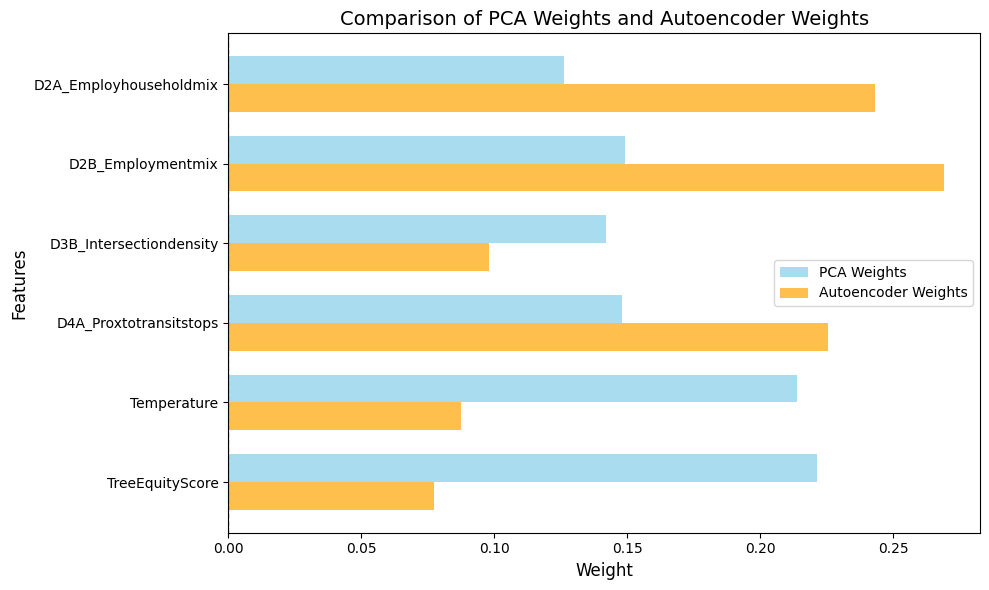

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = np.arange(len(normalized_sum_abs_loadings_pc1_pc4.index))

# Create a mapping for the ranked labels
ranked_label_map = {
    'D2A_Ranked': 'D2A_Employhouseholdmix',
    'D2B_Ranked': 'D2B_Employmentmix',
    'D3B_Ranked': 'D3B_Intersectiondensity',
    'D4A_Ranked': 'D4A_Proxtotransitstops',
    'Temp_Ranked': 'Temperature', # Keep existing if not in map
    'TES_Ranked(1-20)': 'TreeEquityScore' # Keep existing if not in map
}

# Apply the mapping to the y-axis labels
yticklabels = [ranked_label_map.get(label, label) for label in normalized_sum_abs_loadings_pc1_pc4.index]

bar1 = ax.barh(index, normalized_sum_abs_loadings_pc1_pc4, bar_width, label='PCA Weights', color='skyblue', alpha=0.7)
bar2 = ax.barh(index + bar_width, ae_weights_norm.values, bar_width, label='Autoencoder Weights', color='orange', alpha=0.7)

ax.set_xlabel('Weight', fontsize=12)
ax.set_ylabel('Features', fontsize=12)
ax.set_title('Comparison of PCA Weights and Autoencoder Weights', fontsize=14)
ax.set_yticks(index + bar_width / 2)
ax.set_yticklabels(yticklabels)
ax.invert_yaxis() # labels read top-to-bottom

ax.legend()
ax.axvline(x=0, color='gray', linestyle='--', linewidth=1) # Add vertical line at x=0

plt.tight_layout()
plt.show()